# Navigation with Pixels

---

The second part of the first project for the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) using [PyTorch](http://docs.pytorch.org/), [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from scipy.misc import imresize
import os
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from agents.agent import *
from agents.trainer import *
from utils.viz_utils import plot_scores, plot_rolling_scores
from utils.processing import shift_distribution, rgb2grey, preprocess_state

## Load the environment and build the agent

- **Mac**: `"path/to/VisualBanana.app"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

In [3]:
# env = UnityEnvironment(file_name="VisualBanana_Linux/Banana.x86_64", no_graphics=True)
# env = UnityEnvironment(file_name="VisualBanana.app", no_graphics=True)
# fname = "assets/VisualBanana_Linux_NoVis/Banana.x86_64"
fname = "assets/VisualBanana_Linux/Banana.x86_64"
# fname = "assets/VisualBanana.app"

In [4]:
logdir = 'logdir/vizAgent_QCNN_m-stack_4_84x84_Yc_shift-+.5_batch64'

agent_config = {
    'agentClass': VisualAgent, #DQNAgent
#     'memory_buffer': ReplayMemory,
    'memory_size': 1e6,
    'reward_window': 100,
    'batch_size': 64,
    'gamma': 0.99,
    'tau': 1e-3,
    'epsilon': 1.0,
    'epsilon_end': 0.01,
    'epsilon_decay': 0.99,
    'learning_rate': 5e-4,
    'learning_rate_minimum': 5e-4,
    'learning_rate_decay': 0.96,
    'learning_rate_decay_step': 5e5,
    'network_update': 4,
    'm_stack': 4,
    'filepath': 'VisualAgent-checkpoint',#'DQNagent-checkpoint',
    'seed': 0
}

env_config = {
    #'env_type': 'unity',
    'file_name': fname,
    'no_graphics': False,
    'seed': 0, 
    'train_mode': True, 
    'logdir': logdir,
    'agent_config': agent_config
}

### Build the environment / agent

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like:


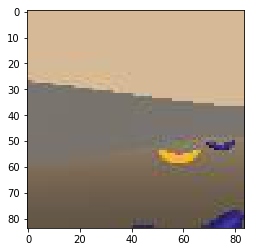

States have length: 1


In [5]:
agent, brain_name, env = build_unity(**env_config)

## Inspect the state properties for tuning agent.observe(state)

In [ ]:
env_info = env.reset(train_mode=False)[brain_name]
state = np.squeeze(env_info.visual_observations[0])
print(f'State shape: {state.shape} | min/max: {state.min()}/{state.max()}')
rescaled_image = imresize(state, (84,84), mode='YCbCr')
print(f'Scaled state shape: {rescaled_image.shape} | min/max: {rescaled_image.min()}/{rescaled_image.max()}')
y_channel = rescaled_image[...,0]
print(f'Y channel shape: {y_channel.shape} | min/max: {y_channel.min()}/{y_channel.max()}')
shifted_state = shift_distribution(y_channel, (-.5,.5))
print(f'Shifted state shape: {shifted_state.shape} | min/max: {shifted_state.min()}/{shifted_state.max()}')
preprocessed_state = preprocess_state(state, rescale=(84,84), shift=(0,1))
print(f'Preprocessed state shape: {preprocessed_state.shape} | min/max: {preprocessed_state.min()}/{preprocessed_state.max()}')


fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 30))
ax1.imshow(np.squeeze(state))
ax1.set_title('Original State')
ax2.imshow(rescaled_image)
ax2.set_title('Resized')
ax3.imshow(y_channel)
ax3.set_title('Y channel')
ax4.imshow(shifted_state)
ax4.set_title('Intensity Shifted')
ax5.imshow(np.squeeze(preprocessed_state))
ax5.set_title('Preprocessed')

# Train the agent

In [8]:
training_config = {
    'agent': agent, 
    'brain_name': brain_name, 
    'env': env, 
    'visual': True, 
    'training': True, 
    'n_episodes': int(1e5), #500, 
    'max_t': 5000, #5000
    'target_reward': 13.,
    'logdir': logdir,
    'show': False, 
    'shift': (-.5,.5),
    'save': True,
    'close': True
}

In [ ]:
scores = train_unity(**training_config)

In [ ]:
plot_rolling_scores(scores);

In [ ]:
env.close()